## Creating the CNN model

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [15]:
classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), padding ='same',activation = 'relu', input_shape = (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3),padding ='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(.2))

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3),padding ='same', activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
#classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 64, activation = 'relu'))
#classifier.add(Dropout(.2))
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 50, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

## Fitting the CNN model to the Dataset

In [8]:
pip show pillow

Name: PillowNote: you may need to restart the kernel to use updated packages.

Version: 9.3.0
Summary: Python Imaging Library (Fork)
Home-page: https://python-pillow.org
Author: Alex Clark (PIL Fork Author)
Author-email: aclark@python-pillow.org
License: HPND
Location: c:\users\ghosh\appdata\local\programs\python\python39\lib\site-packages
Requires: 
Required-by: image, matplotlib


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [9]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 1, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 1, class_mode = 'categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


ValueError: could not broadcast input array from shape (40,40,3) into shape (1,)

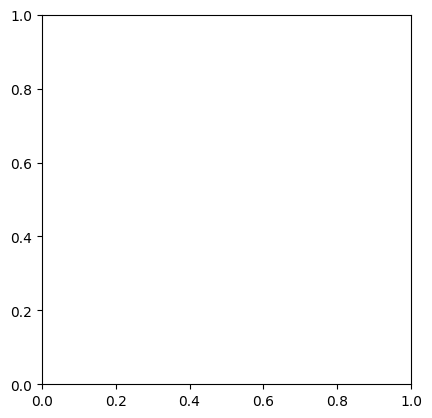

In [5]:
len(training_set)

12000

In [6]:
len(test_set)

3000

In [7]:
classifier.fit_generator(training_set, steps_per_epoch = 12000, epochs = 10,
                        validation_data = test_set, validation_steps = 3000)

C:\Users\ghosh\AppData\Local\Temp\ipykernel_2972\3763744155.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  classifier.fit_generator(training_set, steps_per_epoch = 12000, epochs = 10,


Epoch 1/10
12000/12000 [==============================] - 140s 12ms/step - loss: 3.9163 - accuracy: 0.0174 - val_loss: 3.9124 - val_accuracy: 0.0200
Epoch 2/10
12000/12000 [==============================] - 94s 8ms/step - loss: 3.9149 - accuracy: 0.0174 - val_loss: 3.9125 - val_accuracy: 0.0200
Epoch 3/10
12000/12000 [==============================] - 82s 7ms/step - loss: 3.9148 - accuracy: 0.0177 - val_loss: 3.9124 - val_accuracy: 0.0200
Epoch 4/10
12000/12000 [==============================] - 88s 7ms/step - loss: 3.9149 - accuracy: 0.0167 - val_loss: 3.9124 - val_accuracy: 0.0200
Epoch 5/10
12000/12000 [==============================] - 96s 8ms/step - loss: 3.9149 - accuracy: 0.0157 - val_loss: 3.9124 - val_accuracy: 0.0200
Epoch 6/10
12000/12000 [==============================] - 93s 8ms/step - loss: 3.9149 - accuracy: 0.0166 - val_loss: 3.9124 - val_accuracy: 0.0200
Epoch 7/10
12000/12000 [==============================] - 95s 8ms/step - loss: 3.9148 - accuracy: 0.0196 - val_loss:

In [18]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

## Saving the model

In [19]:
classifier_json = classifier.to_json()

with open("CNN_BanglaHandWrittenCharacterRecognition.json", "w") as json_file:
    json_file.write(classifier_json)
    
classifier.save_weights("CNN_BanglaHandWrittenCharacterRecognition.h5")
print('Saved model to disk')

Saved model to disk


In [20]:
from tensorflow.keras.preprocessing import image


## Creating a graphical user interface to draw the character

In [21]:
import PIL
from PIL import ImageTk, ImageDraw, Image
from tkinter import *
import os

In [22]:
def create_new_image():
    width = 256
    height = 256
    center = height // 2
    white = (255, 255, 255)
    green = (0, 128, 0)
    
    def save():
        filename = 'C:/Users/ghosh/Desktop/Projects/Bangla-Handwritten-Character-Recognition-main/Dataset/Dataset/SinglePrediction/image.jpg'
        image.save(filename)
        
    def paint(event):
        x1, y1 = (event.x - 1), (event.y - 1)
        x2, y2 = (event.x + 1), (event.y + 1)
        cv.create_oval(x1, y1, x2, y2, fill = 'black', width = 30)
        draw.line([x1, y1, x2, y2], fill = 'black', width = 30)
        
    root = Tk()
    
    cv = Canvas(root, width = width, height = height, bg = 'white')
    cv.pack()
    
    image = PIL.Image.new('RGB', (width, height), white)
    draw = ImageDraw.Draw(image)
    
    cv.pack(expand = YES, fill = BOTH)
    cv.bind("<B1-Motion>", paint)
    
    button = Button(text = 'Save', command = save)
    button.pack()
    
    root.mainloop()

In [23]:
def determine_character(res):
    if res == 0:
        print('prediction : অ')
    elif res == 1:
        print('prediction : আ')
    elif res == 2:
        print('prediction : ই')
    elif res == 3:
        print('prediction : ঈ')
    elif res == 4:
        print('prediction : উ')
    elif res == 5:
        print('prediction : ঊ')
    elif res == 6:
        print('prediction : ঋ')
    elif res == 7:
        print('prediction : এ')
    elif res == 8:
        print('prediction : ঐ')
    elif res == 9:
        print('prediction : ও')
    elif res == 10:
        print('prediction : ঔ')
    elif res == 11:
        print('prediction : ক')
    elif res == 12:
        print('prediction : খ')
    elif res == 13:
        print('prediction : গ')
    elif res == 14:
        print('prediction : ঘ')
    elif res == 15:
        print('prediction : ঙ')
    elif res == 16:
        print('prediction : চ')
    elif res == 17:
        print('prediction : ছ')
    elif res == 18:
        print('prediction : জ')
    elif res == 19:
        print('prediction : ঝ')
    elif res == 20:
        print('prediction : ঞ')
    elif res == 21:
        print('prediction : ট')
    elif res == 22:
        print('prediction : ঠ')
    elif res == 23:
        print('prediction : ড')
    elif res == 24:
        print('prediction : ঢ')
    elif res == 25:
        print('prediction : ণ')
    elif res == 26:
        print('prediction : ত')
    elif res == 27:
        print('prediction : থ')
    elif res == 28:
        print('prediction : দ')
    elif res == 29:
        print('prediction : ধ')
    elif res == 30:
        print('prediction : ন')
    elif res == 31:
        print('prediction : প')
    elif res == 32:
        print('prediction : ফ')
    elif res == 33:
        print('prediction : ব')
    elif res == 34:
        print('prediction : ভ')
    elif res == 35:
        print('prediction : ম')
    elif res == 36:
        print('prediction : য')
    elif res == 37:
        print('prediction : র')
    elif res == 38:
        print('prediction : ল')
    elif res == 39:
        print('prediction : শ')
    elif res == 40:
        print('prediction : ষ')
    elif res == 41:
        print('prediction : স')
    elif res == 42:
        print('prediction : হ')
    elif res == 43:
        print('prediction : ড়')
    elif res == 44:
        print('prediction : ঢ়')
    elif res == 45:
        print('prediction : য়')
    elif res == 46:
        print('prediction : ৎ')
    elif res == 47:
        print('prediction : ং')
    elif res == 48:
        print('prediction : ঃ')
    else:
        print('prediction : ঁ')

In [24]:
import numpy as np

def single_prediction(test_img):
    test_img_arr = image.img_to_array(test_img)
    test_img_arr = np.expand_dims(test_img_arr, axis = 0)
    prediction = classifier.predict(test_img_arr)
    result = np.argmax(prediction, axis = 1)
    determine_character(result)

In [25]:
def delete_created_image():
    os.remove('C:/Users/ghosh/Desktop/Projects/Bangla-Handwritten-Character-Recognition-main/Dataset/Dataset/SinglePrediction/image.jpg')

In [26]:


def draw_n_guess_the_character():
    create_new_image()
    test_img = image.load_img('C:/Users/ghosh/Desktop/Projects/Bangla-Handwritten-Character-Recognition-main/Dataset/Dataset/SinglePrediction/image.jpg', target_size = (25, 25, 3))
    single_prediction(test_img)
    plt.imshow(test_img)
    delete_created_image()

1/1 [==============================] - 0s 31ms/step
prediction : আ


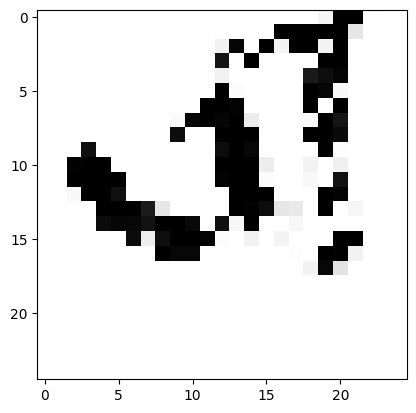

In [30]:
draw_n_guess_the_character()
